# This is a library to find the best performing configuration from a set of dimensions (i.e. schemas, partition, storage) which can be specified inside the <b>settings.yaml</b> file in the resource

In [ ]:
%pip install PAPyA==0.1.0

In [2]:
from PAPyA.file_reader import FileReader

config = "settings_watdiv.yaml" # config file location
logs = "log_watdiv" # logs file location

data = FileReader(config, logs, "100M", "partition")
data.file_reader().head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
wpt.horizontal.orc,205.284760,162.349280,107.103639,49.960609,4.897310,137.597456,123.489869,126.356856,51.734231,2.021613,1.485276,1.475116,1.179094,96.953134,1.635209,1.798740,1.689067,1.583253,1.537363,88.555925
wpt.subject.orc,205.284760,162.349280,107.103639,46.538501,4.792330,137.141939,122.830371,120.770813,51.044675,1.941470,1.585538,1.500106,1.301714,95.324892,1.611576,1.806495,1.586672,1.535757,1.498826,87.609701
extvp.horizontal.orc,28.317974,8.380679,16.356181,3.699681,3.849585,6.759247,7.037816,8.952976,2.713537,2.034422,2.774800,1.886937,2.354927,7.321082,3.143353,3.761165,4.081184,3.824393,2.925221,3.211407
extvp.subject.orc,26.222651,8.085237,13.784482,3.599803,4.964006,6.786540,6.106795,9.201700,2.988024,2.276728,1.880820,1.592739,3.056882,7.205297,3.512296,2.727579,2.538742,3.149827,2.906339,3.257666
pt.predicate.orc,145.596942,70.085727,56.553928,58.319764,60.215598,64.575442,63.202007,50.897337,50.568666,35.846661,5.386345,50.430773,35.848949,16.894680,39.391232,49.426256,86.099177,56.488256,64.709584,54.107631


In [4]:
# this class takes single dimension and dataset sizes as parameters that user specified inside their log files
from Rank import SDRank

config = "settings_watdiv.yaml" # config file location
logs = "log_watdiv" # logs file location

schemaSDRank = SDRank(config, logs, '100M', 'schemas')
partitionSDRank = SDRank(config, logs, '100M', 'partition')
storageSDRank = SDRank(config, logs, '100M', 'storage')

In [5]:
# calculateRank method comes with parameters to sort the result and exclude queries that we want
excludeQuery = [1,2,5]
schemaSDRank.calculateRank().head()

,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Result
extvp.predicate.parquet,18.0,2.0,0.0,0.0,0.0,0.9750
extvp.predicate.csv,15.0,4.0,1.0,0.0,0.0,0.9250
extvp.predicate.avro,13.0,7.0,0.0,0.0,0.0,0.9125
extvp.horizontal.avro,12.0,8.0,0.0,0.0,0.0,0.9000
extvp.subject.avro,12.0,7.0,1.0,0.0,0.0,0.8875


In [6]:
excludeQuery = [1,2,5]
partitionSDRank.calculateRank('horizontal', excludeQuery)

,Rank 1,Rank 2,Rank 3,Result
wpt.horizontal.parquet,16.0,0.0,1.0,0.941176
extvp.horizontal.csv,9.0,8.0,0.0,0.764706
pt.horizontal.orc,9.0,7.0,1.0,0.735294
pt.horizontal.parquet,8.0,9.0,0.0,0.735294
vp.horizontal.csv,7.0,10.0,0.0,0.705882
pt.horizontal.avro,5.0,11.0,1.0,0.617647
extvp.horizontal.orc,8.0,0.0,9.0,0.470588
pt.horizontal.csv,3.0,9.0,5.0,0.441176
wpt.horizontal.csv,0.0,14.0,3.0,0.411765
st.horizontal.parquet,2.0,10.0,5.0,0.411765


In [4]:
storageSDRank.calculateRank().head()

,Rank 1,Rank 2,Rank 3,Rank 4,Result
st.subject.orc,19.0,1.0,0.0,0.0,0.983333
pt.horizontal.orc,18.0,0.0,1.0,1.0,0.916667
vp.subject.csv,17.0,1.0,1.0,1.0,0.900000
vp.horizontal.csv,15.0,4.0,0.0,1.0,0.883333
wpt.horizontal.parquet,16.0,1.0,0.0,3.0,0.833333


In [43]:
from Rank import SDRank
config = "settings_watdiv.yaml"
logs = "log_watdiv"

schemaSDRank = SDRank(config, logs, '100M', 'schemas')
storageSDRank = SDRank(config, logs, '100M', 'storage')
partitionSDRank = SDRank(config, logs, '100M', 'partition')

partitionSDRank.plotRadar()

In addition to radar plot, PAPyA also provides visualization that shows the performance of a single dimension parameters that user can choose in terms of their rank scores<br>
This <b>plot</b> method takes a single argument which is the view projection option that user can specify

<AxesSubplot:title={'center':'orc'}>

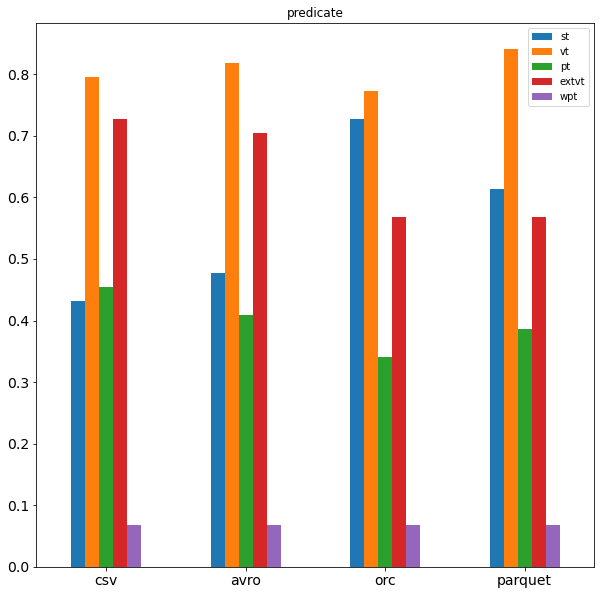

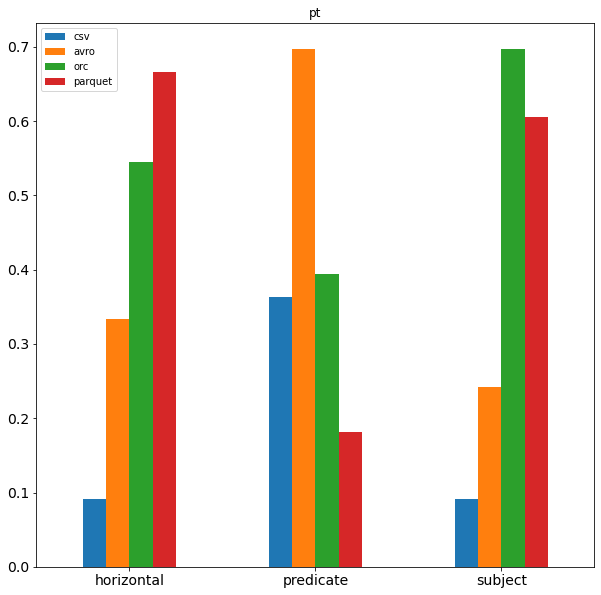

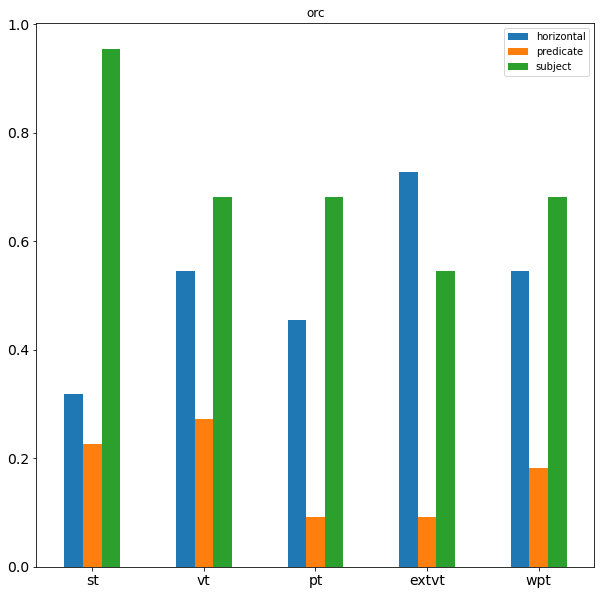

In [52]:
# example of schema dimension plots
config = "settings.yaml"
logs = "log"

SDRank(config, logs, '100M', 'schemas').plot('predicate')
SDRank(config, logs, '100M', 'storage').plot('pt')
SDRank(config, logs, '100M', 'partition').plot('orc')

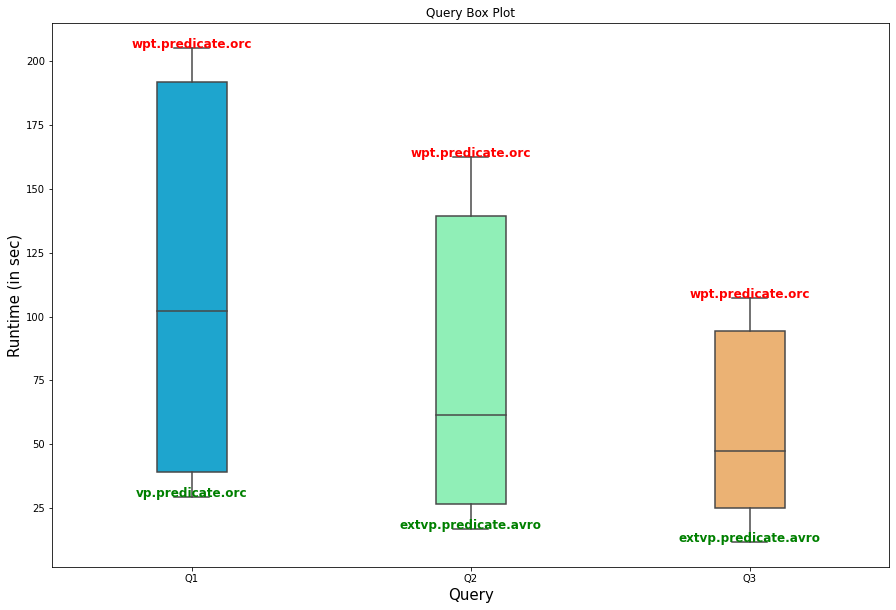

In [58]:
config = "settings_watdiv.yaml" # config file location
logs = "log_watdiv" # logs file location

from Rank import SDRank

query = ['Q1', 'Q2', 'Q3']
schemaSDRank = SDRank(config, logs, '100M', 'schemas').plotBox(query)

In [7]:
# example of MDRank class with 100M dataset size as ranking set of the experiment
from Rank import MDRank

config = "settings_watdiv.yaml"
logs = "log_watdiv"

multiDimensionRank = MDRank(config, logs, '100M')

In [8]:
# this is the top 5 configurations according to paretoQ method sorted from best to worst
multiDimensionRank.paretoQ().head()

,Solution,Dominated
0,extvp.predicate.csv,st.predicate.orc
1,extvp.predicate.parquet,st.predicate.parquet
2,pt.subject.csv,vp.subject.avro
3,pt.horizontal.csv,st.subject.parquet
4,extvp.predicate.avro,vp.horizontal.avro


In [17]:
# this is the top 5 configurations according to paretoAgg method sorted from best to worst
multiDimensionRank.paretoAgg()

,Solution,Dominated
0,vp.predicate.csv,st.predicate.csv
1,pt.subject.csv,pt.predicate.orc
2,extvp.predicate.parquet,wpt.subject.csv
3,pt.horizontal.orc,st.horizontal.csv
4,st.subject.orc,pt.predicate.csv
5,vp.subject.csv,wpt.horizontal.csv
6,extvp.predicate.csv,pt.predicate.avro
7,,pt.predicate.parquet
8,,wpt.horizontal.avro
9,,st.horizontal.avro


The <b>plot</b> method shows the solutions for _paretoAgg_ as shades of green areas projected in a three dimensional space

(7, 3) (49, 3)


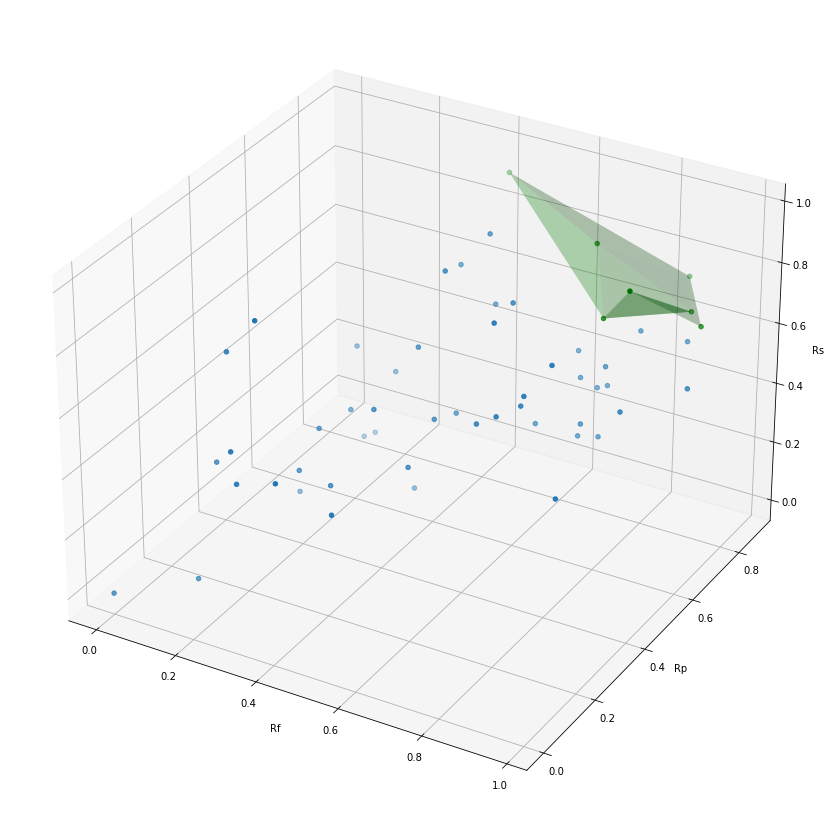

In [69]:
multiDimensionRank.plot()

In [1]:
# both conformance and coherence classes takes a list of ranking criterion that the user can specify
from Ranker import Conformance, Coherence

config = 'settings_watdiv.yaml'
logs = 'log_watdiv'

conformance_set = ['schemas', 'partition', 'storage', 'paretoQ', 'paretoAgg']
coherence_set = ['schemas', 'partition', 'storage', 'paretoQ', 'paretoAgg']

conf = Conformance(config, logs, '100M', conformance_set, 3, 8)
coh = Coherence(config, logs,coherence_set)

In [6]:
conf.run()

,100M
schemas,0.566667
partition,0.383333
storage,0.183333
paretoQ,0.616667
paretoAgg,0.466667


In [14]:
conf.showCriteriaTable(dimension = 'paretoQ')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
extvp.predicate.csv,8,9,2,1,9,3,1,6,20,20,12,6,3,4,7,2,5,11,3,14
extvp.predicate.parquet,2,10,19,6,29,5,4,19,6,5,14,5,23,3,5,7,1,6,1,30
pt.subject.csv,6,19,26,2,3,6,3,2,15,31,8,29,4,1,23,4,10,12,9,1


In [3]:
conf.showTable(dimension = 'storage')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
st.subject.orc,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
pt.horizontal.orc,True,True,False,True,False,True,True,False,True,False,True,True,True,True,True,True,True,False,True,True
vp.subject.csv,True,True,True,True,True,False,True,False,False,True,False,False,True,True,True,True,True,True,True,True


In [2]:
coh.run('100M', '250M')

,Kendall's Index
schemas,0.311111
partition,0.491964
storage,0.506033
paretoQ,0.469841
paretoAgg,0.666667


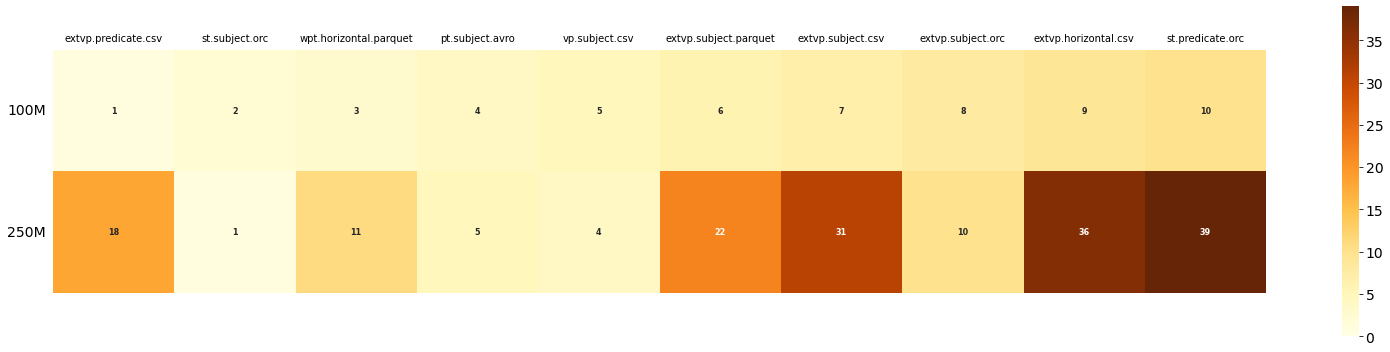

In [8]:
# only takes single dimensions
coh.heatMap('100M', "250M", dimension='partition')

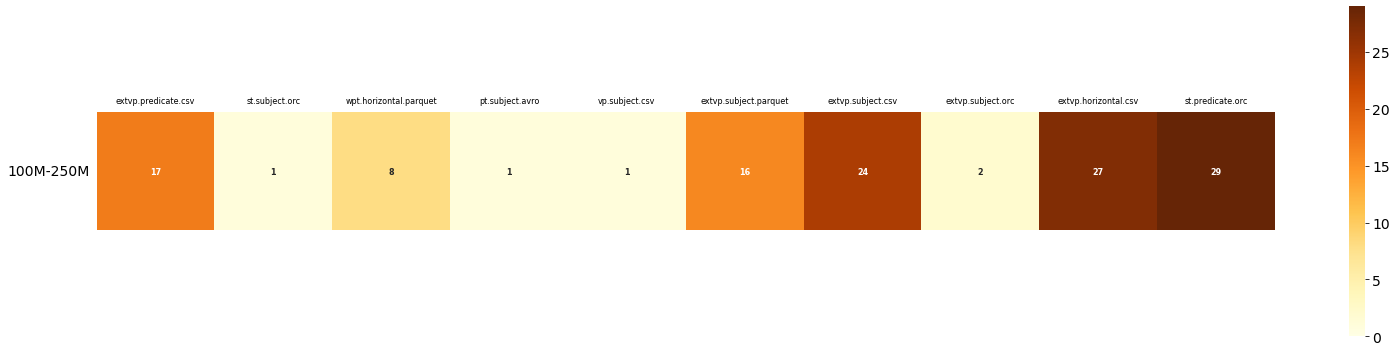

In [10]:
coh.heatMapSubtract('100M', '250M', dimension='partition')

In [6]:
import ahpy

query_comparison = {('Q1', 'Q2'): 1/7, ('Q1', 'Q3'): 1, ('Q1', 'Q4'): 1/9, ('Q1', 'Q5'): 1/3,
                    ('Q1', 'Q6'): 1/5, ('Q1', 'Q7'): 1/7, ('Q1', 'Q8'): 1/9, ('Q1', 'Q9'): 1/3, ('Q1', 'Q10'): 1, ('Q1', 'Q11'): 1,
                    ('Q2', 'Q3'): 7, ('Q2', 'Q4'): 1/9, ('Q2', 'Q5'): 3,
                    ('Q2', 'Q6'): 5, ('Q2', 'Q7'): 1, ('Q2', 'Q8'): 1/9, ('Q2', 'Q9'): 3, ('Q2', 'Q10'): 7, ('Q2', 'Q11'): 7,
                    ('Q3', 'Q4'): 1/9, ('Q3', 'Q5'): 1/3,
                    ('Q3', 'Q6'): 1/5, ('Q3', 'Q7'): 1/7, ('Q3', 'Q8'): 1/9, ('Q3', 'Q9'): 1/3, ('Q3', 'Q10'): 1, ('Q3', 'Q11'): 1,
                    ('Q4', 'Q5'): 3,
                    ('Q4', 'Q6'): 5, ('Q4', 'Q7'): 7, ('Q4', 'Q8'): 1, ('Q4', 'Q9'): 3, ('Q4', 'Q10'): 9, ('Q4', 'Q11'): 9,
                    ('Q5', 'Q6'): 1/5, ('Q5', 'Q7'): 1/7, ('Q5', 'Q8'): 1/9, ('Q5', 'Q9'): 1, ('Q5', 'Q10'): 3, ('Q5', 'Q11'): 3,
                    ('Q6', 'Q7'): 1/7, ('Q6', 'Q8'): 1/9, ('Q6', 'Q9'): 3, ('Q6', 'Q10'): 5, ('Q6', 'Q11'): 5,
                    ('Q7', 'Q8'): 1/9, ('Q7', 'Q9'): 3, ('Q7', 'Q10'): 7, ('Q7', 'Q11'): 7,
                    ('Q8', 'Q9'): 3, ('Q8', 'Q10'): 9, ('Q8', 'Q11'): 9,
                    ('Q9', 'Q10'): 3, ('Q9', 'Q11'): 3,
                    ('Q10', 'Q11'): 1,}

queries = ahpy.Compare(name='Queries', comparisons=query_comparison, precision=3, random_index='saaty')

print(queries.target_weights)

print(queries.consistency_ratio)

{'Q8': 0.319, 'Q4': 0.264, 'Q7': 0.119, 'Q2': 0.098, 'Q6': 0.062, 'Q9': 0.043, 'Q5': 0.035, 'Q1': 0.015, 'Q3': 0.015, 'Q10': 0.015, 'Q11': 0.015}
0.119
